# SINGLE LAYER PERCEPTRON 

### Abhishek Kar

Using the above mathematics I have written the code for the perceptron model.We will see what is happening 
inside the model

In [3]:
from pandas import DataFrame
import numpy as np

In [4]:
#creating a class called perceptron 
class perceptron:
    #initialising the perceptron
    def __init__(self,inodes,onodes,bias=0):#inodes-no of input nodes,onodes-no of outputs nodes
        self.inodes=inodes
        self.onodes=onodes
        self.bias=bias
        if bias==0:
            self.weights=np.random.randn(onodes,inodes)
        else:
            self.weights=np.random.randn(onodes,inodes+1)
    #training the perceptron
    def train(self,data,eta,iteration):
        for i in range(iteration):
            for i in range(len(data.index)):
                inputs=np.array(data.ix[i][:self.inodes]).reshape((self.inodes,1))
                inputs=np.insert(inputs, self.inodes,self.bias,axis=0)
                targets=np.array(data.ix[i,self.inodes:]).reshape((self.onodes,1))
                outputs=np.dot(self.weights,inputs)
                outputs=np.where(outputs>0,1,0)
                error=targets-outputs
                self.weights += eta*(np.dot(error,np.transpose(inputs)))
        return self.weights
    #testing the perceptron
    def test(self,data):
        for i in range(len(data.index)):
                inputs=np.array(data.ix[i][:self.inodes]).reshape((self.inodes,1))
                inputs=np.insert(inputs, self.inodes,self.bias,axis=0)
                outputs=np.dot(self.weights,inputs)
                outputs=np.where(outputs>0,1,0)
                print('output is',outputs[0])    

In [5]:
#creating a data for OR gate
or_gate=DataFrame(np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]]),columns=['input1','input2','target'])
or_gate

,input1,input2,target
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


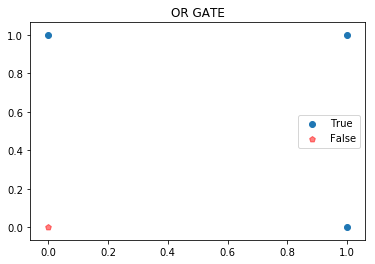

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(or_gate['input1'][1:],or_gate['input2'][1:],label='True')
plt.scatter(0,0,color='r',marker='p',alpha=0.5,label='False')
plt.title('OR GATE')
plt.legend(loc='best')

From the above plot we can clearly see that the points indicating True are linearly seperable from the point indicating False

Using perecptron to classify the OR gate. 

In [7]:
p = perceptron(2,1,-1)
p.train(or_gate,0.25,10)
p.test(or_gate)

output is [0]
output is [1]
output is [1]
output is [1]


Perceptron model can classify the OR gate as it is linearly seperable

In [8]:
##creating a data for XOR gate
xor_gate=DataFrame(np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]]),columns=['input1','input2','target'])
xor_gate

,input1,input2,target
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


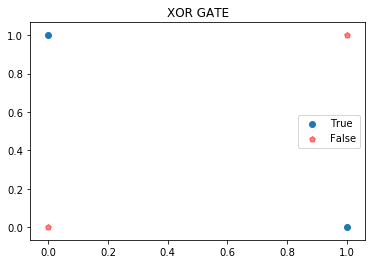

In [9]:

plt.scatter(xor_gate['input1'][1:3],xor_gate['input2'][1:3],label='True')
plt.scatter(0,0,color='r',marker='p',alpha=0.5,label='False')
plt.scatter(1,1,color='r',marker='p',alpha=0.5)
plt.title('XOR GATE')
plt.legend(loc='best')

From the above plot we can clearly see that the points indicating true and False are not linearly seperable

Using perceptron to classify the XOR gate

In [10]:
p = perceptron(2,1,-1)
p.train(xor_gate,0.25,15)
p.test(xor_gate)

output is [1]
output is [0]
output is [0]
output is [0]


Perceptron fails to classify the XOR gate as it is not linearly seperable.

However there is asolution to that,if we can transform the data to a higher dimension then it might be seperable using
a hyperplane.

Adding a third input to the existing XOR gate and thus increasing the dimension from 2-D to 3-D.

In [11]:
##creating a data for XOR gate
xor_gate=DataFrame(np.array([[0,0,1,0],[0,1,0,1],[1,0,0,1],[1,1,0,0]]),columns=['input1','input2','input3','target'])
xor_gate

,input1,input2,input3,target
0,0,0,1,0
1,0,1,0,1
2,1,0,0,1
3,1,1,0,0


Now lets see how the perceptron model works

In [12]:
p = perceptron(3,1,-1)
p.train(xor_gate,0.25,15)
p.test(xor_gate)

output is [0]
output is [1]
output is [1]
output is [0]


Well now it can easily classify the XOR gate

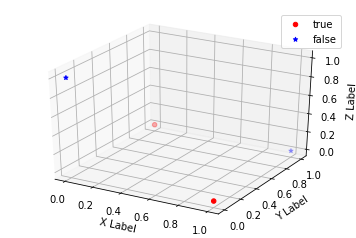

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_true =[0,1]
y_true=[1,0]
z_true=[0,0]

ax.scatter(x_true, y_true, z_true, c='r', marker='o',label='true')

x_false =[0,1]
y_false=[0,1]
z_false=[1,0]

ax.scatter(x_false, y_false, z_false, c='b', marker='*',label='false')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.legend(loc='best')
plt.show()

From the plot we can see that an 2-D hyperplane can be used to seperate the True and False points.These are some of the logic behind the working of a perceptron model.